In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import multivariate_normal
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from factor_analyzer.factor_analyzer import calculate_kmo
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Deskripsi statistik untuk variabel numerik
print(df[['Age', 'Fare']].describe())

# Deskripsi statistik untuk variabel kategorik
print(df['Sex'].value_counts())
print(df['Pclass'].value_counts())

              Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200
Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


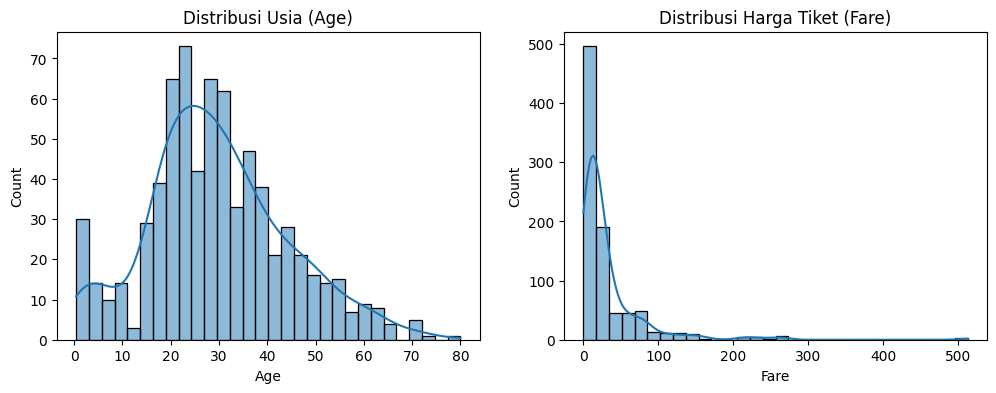

In [4]:
# Histogram untuk variabel numerik
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Distribusi Usia (Age)')

plt.subplot(1, 2, 2)
sns.histplot(df['Fare'].dropna(), kde=True, bins=30)
plt.title('Distribusi Harga Tiket (Fare)')
plt.show()

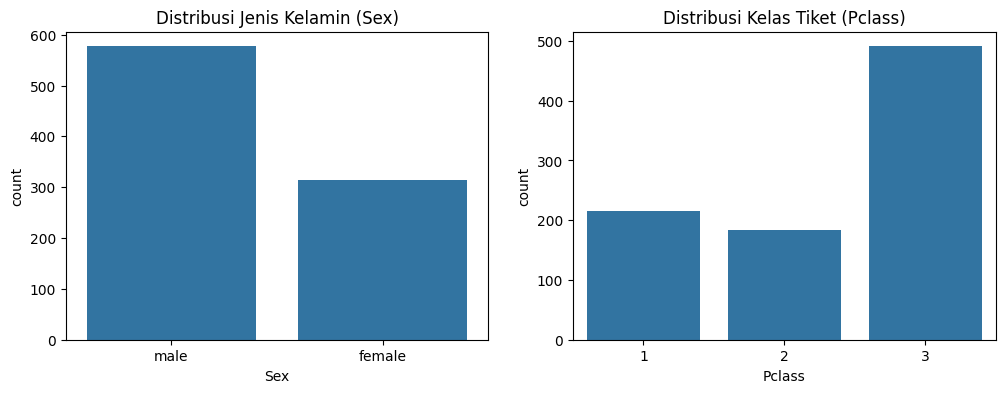

In [5]:
# Bar plot untuk variabel kategorik
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='Sex', data=df)
plt.title('Distribusi Jenis Kelamin (Sex)')

plt.subplot(1, 2, 2)
sns.countplot(x='Pclass', data=df)
plt.title('Distribusi Kelas Tiket (Pclass)')
plt.show()

In [6]:
# Uji normalitas untuk variabel numerik
age_normal_test = stats.shapiro(df['Age'].dropna())
fare_normal_test = stats.shapiro(df['Fare'].dropna())

print(f"Uji Normalitas Usia (Age): Statistik={age_normal_test[0]}, p-value={age_normal_test[1]}")
print(f"Uji Normalitas Harga Tiket (Fare): Statistik={fare_normal_test[0]}, p-value={fare_normal_test[1]}")

Uji Normalitas Usia (Age): Statistik=0.981458306312561, p-value=7.340329943872348e-08
Uji Normalitas Harga Tiket (Fare): Statistik=0.5218917727470398, p-value=1.0789998175301091e-43


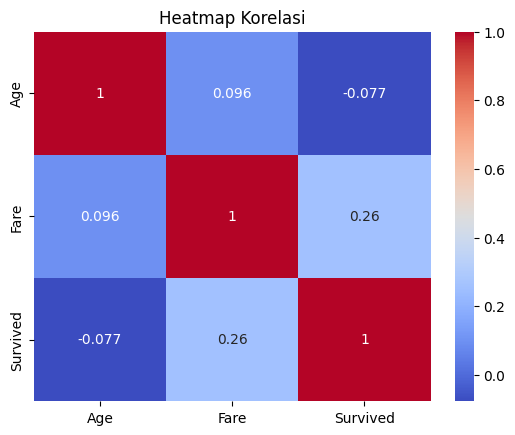

In [7]:
# Heatmap korelasi
corr = df[['Age', 'Fare', 'Survived']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

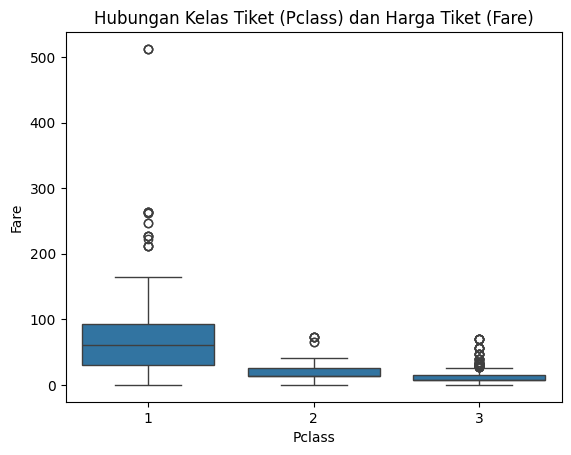

In [8]:
# Boxplot untuk melihat hubungan antara Pclass dan Fare
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Hubungan Kelas Tiket (Pclass) dan Harga Tiket (Fare)')
plt.show()

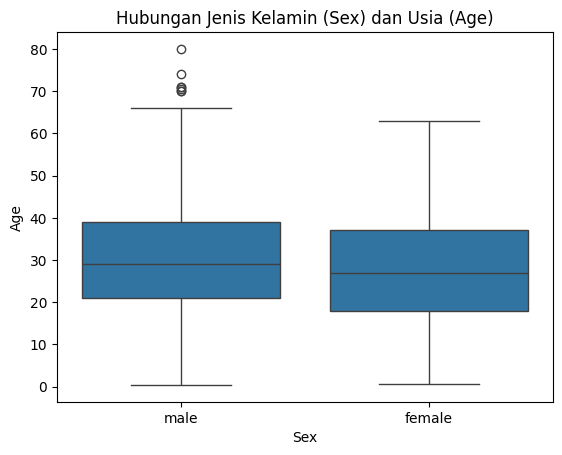

In [9]:
# Boxplot untuk melihat hubungan antara Sex dan Age
sns.boxplot(x='Sex', y='Age', data=df)
plt.title('Hubungan Jenis Kelamin (Sex) dan Usia (Age)')
plt.show()

In [10]:
# Uji t-test untuk perbedaan usia antara yang selamat dan tidak selamat
survived_age = df[df['Survived'] == 1]['Age'].dropna()
not_survived_age = df[df['Survived'] == 0]['Age'].dropna()
t_test_result = stats.ttest_ind(survived_age, not_survived_age)

print(f"Uji t-test Usia: Statistik={t_test_result[0]}, p-value={t_test_result[1]}")

Uji t-test Usia: Statistik=-2.06668694625381, p-value=0.03912465401348249


In [11]:
# Persiapkan data
X = df[['Age', 'Fare', 'Pclass']]
X = sm.add_constant(X)  # Tambahkan konstanta
y = df['Survived']

# Hapus baris dengan missing values
X = X.dropna()
y = y[X.index]

# Fit model regresi linear
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     53.04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           6.12e-31
Time:                        22:36:23   Log-Likelihood:                -433.23
No. Observations:                 714   AIC:                             874.5
Df Residuals:                     710   BIC:                             892.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1626      0.088     13.165      0.0

In [12]:
# Hitung VIF (Variance Inflation Factor)
vif_data = pd.DataFrame()
vif_data["Variabel"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  Variabel        VIF
0    const  28.098740
1      Age   1.181104
2     Fare   1.472237
3   Pclass   1.688894


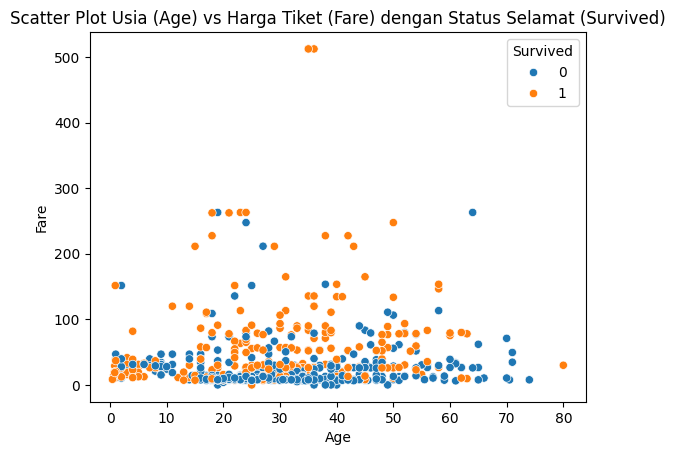

In [13]:
# Scatter plot dengan hue untuk variabel kategorik
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Scatter Plot Usia (Age) vs Harga Tiket (Fare) dengan Status Selamat (Survived)')
plt.show()

In [14]:
# Deteksi outlier untuk variabel 'Age'
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR))]
print("Outlier pada variabel Age:")
print(outliers[['Age']])

Outlier pada variabel Age:
      Age
33   66.0
54   65.0
96   71.0
116  70.5
280  65.0
456  65.0
493  71.0
630  80.0
672  70.0
745  70.0
851  74.0


In [15]:
# Pisahkan data berdasarkan grup
group1 = df[df['Pclass'] == 1]['Fare'].dropna()
group2 = df[df['Pclass'] == 2]['Fare'].dropna()
group3 = df[df['Pclass'] == 3]['Fare'].dropna()

# Uji Bartlett
bartlett_test = stats.bartlett(group1, group2, group3)
print(f"Bartlett Test: Statistik={bartlett_test[0]}, p-value={bartlett_test[1]}")

Bartlett Test: Statistik=1306.9172750322514, p-value=1.6088648917853303e-284


In [16]:
# Pilih variabel numerik
numerical_data = df[['Age', 'Fare']].dropna()

# Uji Mardia's Test (implementasi manual)
def mardias_test(data):
    n, p = data.shape
    mean = data.mean(axis=0)
    cov = data.cov()
    inv_cov = np.linalg.inv(cov)
    centered_data = data - mean
    skewness = np.sum(np.dot(centered_data, inv_cov) ** 3) / n
    kurtosis = np.sum(np.dot(centered_data, inv_cov) ** 4) / n
    return skewness, kurtosis

skewness, kurtosis = mardias_test(numerical_data)
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Skewness: 0.00015621899823863903, Kurtosis: 7.720958991574701e-05


In [17]:
from statsmodels.multivariate.manova import MANOVA

# Uji Box's M Test (menggunakan MANOVA)
manova = MANOVA.from_formula('Age + Fare ~ Pclass', data=df.dropna())
print(manova.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.2781 2.0000 180.0000 233.5682 0.0000
         Pillai's trace 0.7219 2.0000 180.0000 233.5682 0.0000
 Hotelling-Lawley trace 2.5952 2.0000 180.0000 233.5682 0.0000
    Roy's greatest root 2.5952 2.0000 180.0000 233.5682 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
          Pclass         Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.7870 2.0000 180.0000 24.3590 0.0000
          Pillai's trace 0.2130 2.0000 180.0000 24.3590 0.0000
  Hotelling

In [25]:
# Combine all variables into one dataframe and drop NA values all at once
regression_data = pd.concat([
    df['Survived'],
    df[['Age', 'Fare']]
], axis=1).dropna()

# Now split into X and y
X = sm.add_constant(regression_data[['Age', 'Fare']])
y = regression_data['Survived']

# Fit the model
model = sm.OLS(y, X).fit()
print(f"Number of observations: {len(y)}")
print(f"Shape of X: {X.shape}")

Number of observations: 714
Shape of X: (714, 3)


In [ ]:
# Uji t-test
t_test = stats.ttest_ind(df[df['Survived'] == 1]['Age'].dropna(),
                         df[df['Survived'] == 0]['Age'].dropna())
print(f"T-Test: Statistik={t_test[0]}, p-value={t_test[1]}")

T-Test: Statistik=-2.06668694625381, p-value=0.03912465401348249


In [21]:
# Uji F-test
f_test = stats.f_oneway(df[df['Pclass'] == 1]['Fare'].dropna(),
                        df[df['Pclass'] == 2]['Fare'].dropna(),
                        df[df['Pclass'] == 3]['Fare'].dropna())
print(f"F-Test: Statistik={f_test[0]}, p-value={f_test[1]}")

F-Test: Statistik=242.34415651744814, p-value=1.0313763209141171e-84


In [22]:
bp_test = het_breuschpagan(model.resid, model.model.exog)
print(f"Breusch-Pagan Test: Statistik={bp_test[0]}, p-value={bp_test[1]}")

Breusch-Pagan Test: Statistik=11.566645426987126, p-value=0.009025149771579222


In [23]:
kmo_all, kmo_model = calculate_kmo(df[['Age', 'Fare', 'Pclass']].dropna())
print(f"KMO: {kmo_model}")

KMO: 0.48557319909545926


In [24]:
contingency_table = pd.crosstab(df['Sex'], df['Survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test: Chi2={chi2}, p-value={p}")

Chi-Square Test: Chi2=260.71702016732104, p-value=1.1973570627755645e-58
